<a href="https://colab.research.google.com/github/Gulzar-khan/ML-PRACTICE/blob/main/Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/ML/week 9/2. Self Project/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


# There is no null values in our dataset

In [ ]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [ ]:
# duplicate
len(df[df.duplicated()])

763

# Removing duplicates

In [ ]:
# df.drop_duplicates([‘col1’])   # https://mylearningsinaiml.wordpress.com/2018/11/26/handling-duplicate-data/
df=df.drop_duplicates()

In [ ]:
df.reset_index(inplace=True)

In [ ]:
del df['index']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

# Exploratory Data Analysis

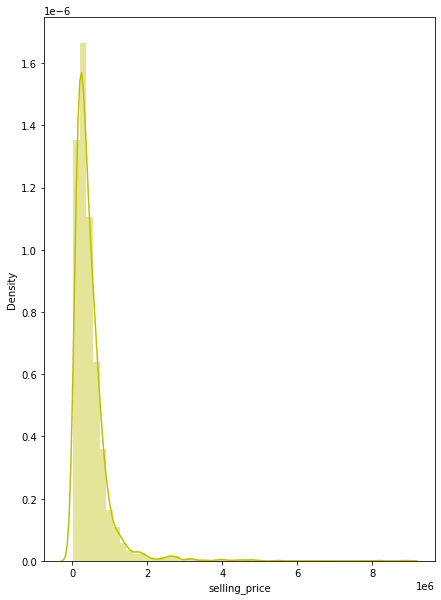

In [ ]:
# dependent variable selling_price
plt.figure(figsize=(7,10))
sns.distplot(df['selling_price'],color='y')

From se above graph we can see as our price in  10^6 so it our graph is movig towards to y axis and we couldn't get any better visualziation with these type of graph.
<br>So,It better to take log of the dependent variable to draw the graph.

**Let's take a log of selling price and draw the plot it will give us more clarification about data and we can visualize in a better way...**

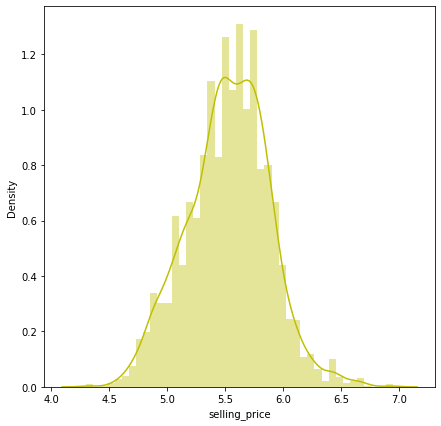

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['selling_price']),color='y')

If we see the above graph it's look like a normal distribution than above one..

In [ ]:
# df['fuel'] = df['fuel'].replace({'Petrol': 0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4})


In [ ]:
# df['seller_type']=df['seller_type'].replace({'Individual':0,'Dealer':1})

In [ ]:
# numeric_features=df.describe(include='all').columns
numeric_features=df.describe().columns
numeric_features

Index(['year', 'selling_price', 'km_driven'], dtype='object')

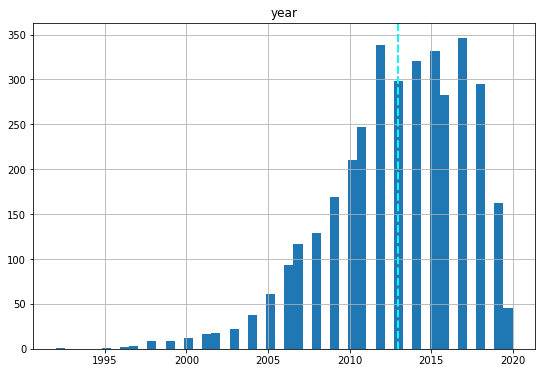

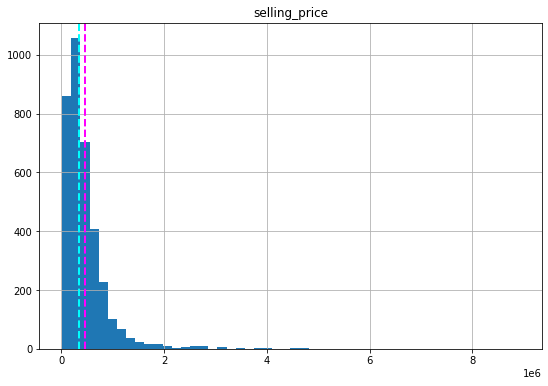

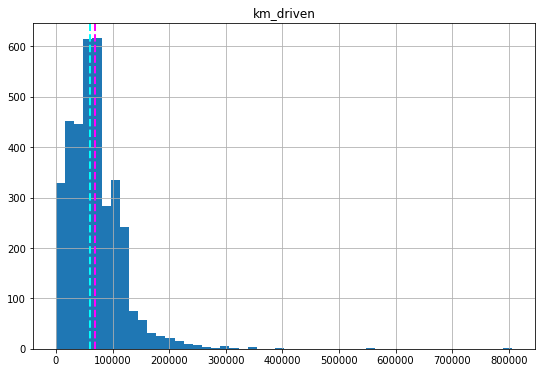

In [ ]:

# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

year-left-skewed
km-driven and selling_price - right skewed

## **Transformation**

---
Below are the some type of method or way to deal above type of problem.

**square-root for moderate skew:** sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

**log for greater skew:** log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

**inverse for severe skew:** 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

**Linearity and heteroscedasticity:** First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.




From above it's clear that our numeric data is right as well as left skewed for some columns..
<br> Let's try to make it noraml distribution..by tranforming the data into some other form..and then visualize the thing..

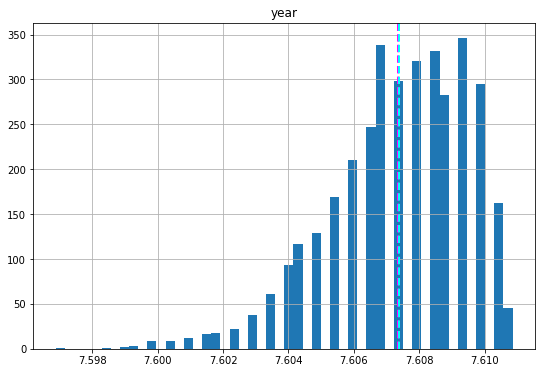

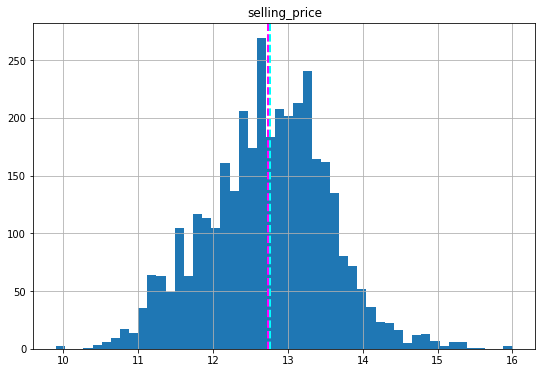

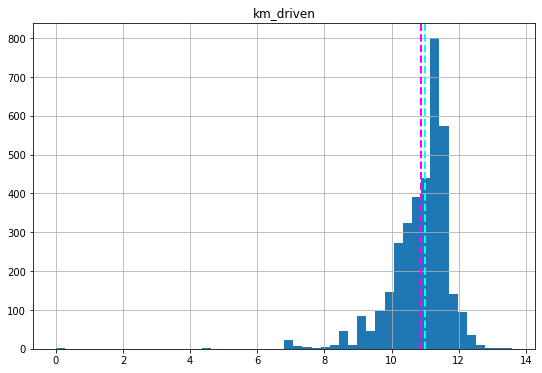

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

Now, we can visualize what the relationship between them...
<br>**Let's try to plot some scatter** plot between independent with the dependent variable and figure out how they behaves or what they have relationship....

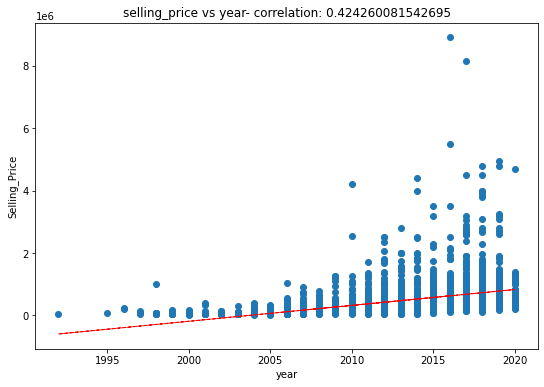

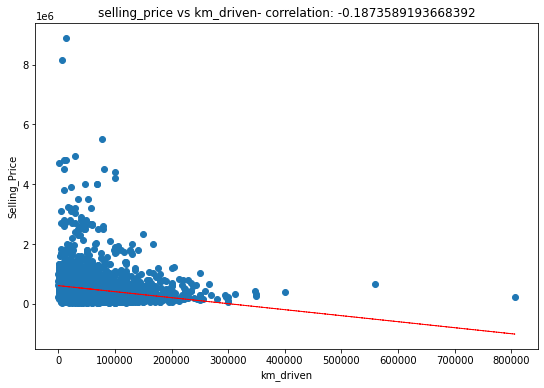

In [ ]:
for col in numeric_features[::2]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Selling_Price')
    ax.set_title('selling_price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['selling_price'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

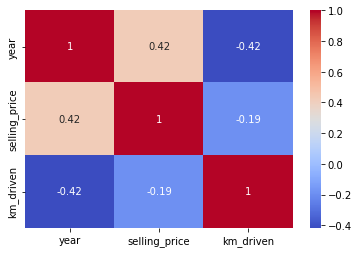

In [ ]:
correlation=df.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['selling_price']]])

,variables,VIF
0,year,3.110934
1,km_driven,3.110934


In [ ]:
numerical_features=['year','km_driven']

In [ ]:
df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [ ]:
df['company'] = df['name'].str.split(" ", expand=True)[0]
# # dataset['company'] = dataset['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
#                                                       'maxda':'Mazda','porcshce':'Porsche'})
df['company'] = df['company'].str.title()
df['company'].value_counts()

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
Bmw                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
Mg                  2
Opelcorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: company, dtype: int64

In [ ]:
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'company'], dtype='object')

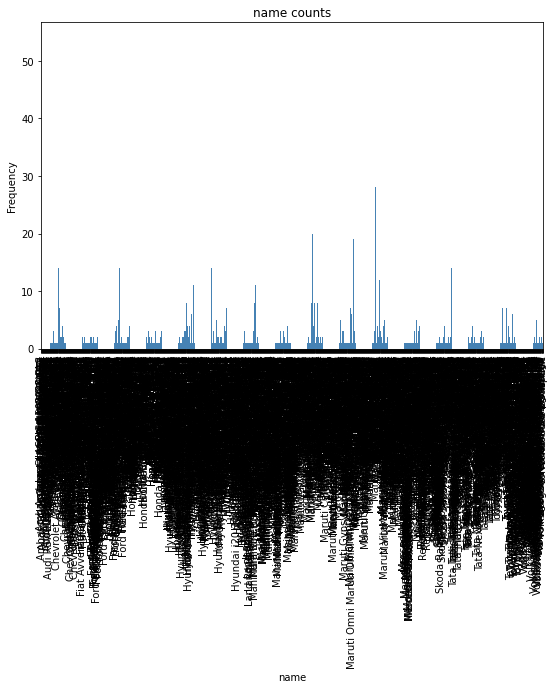

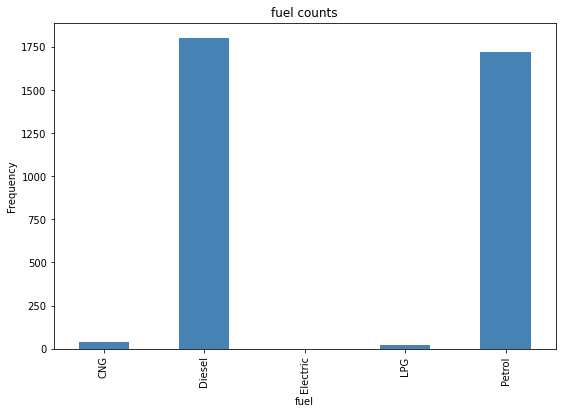

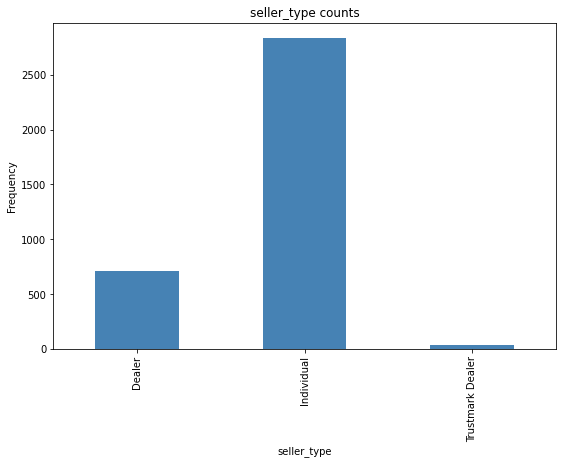

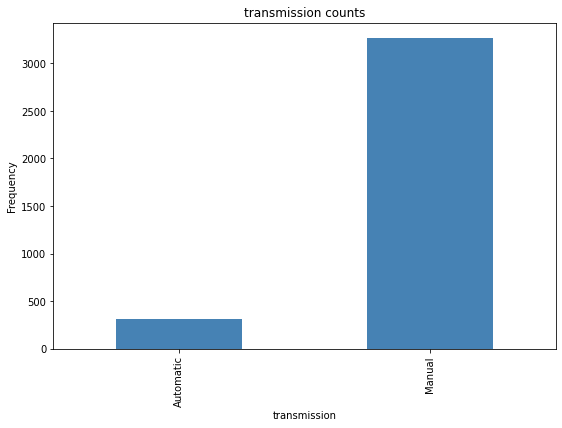

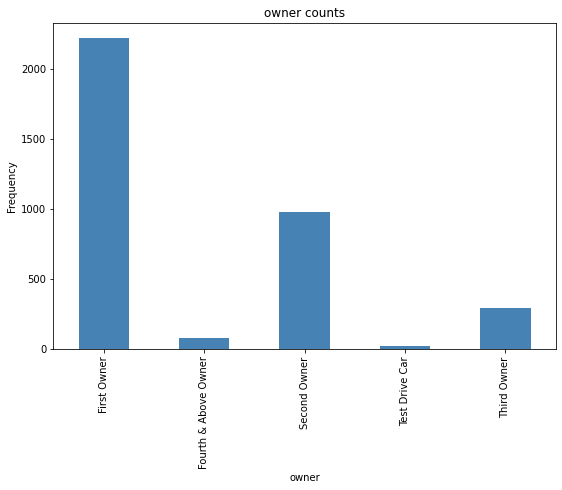

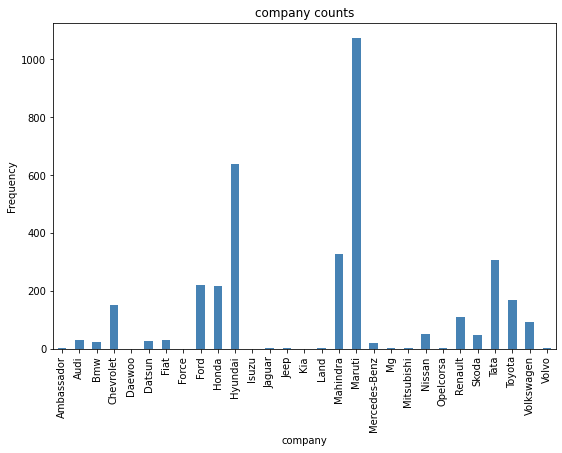

In [ ]:

for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

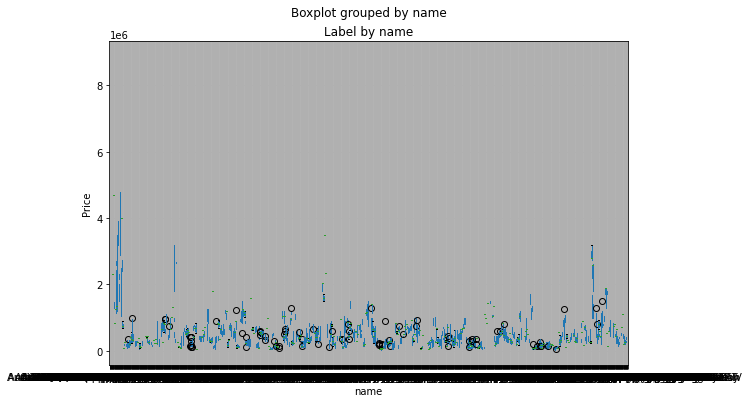

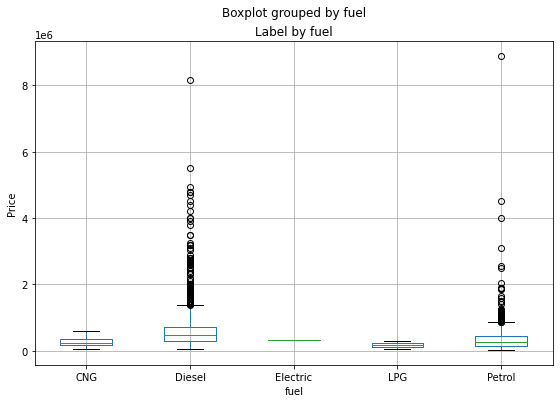

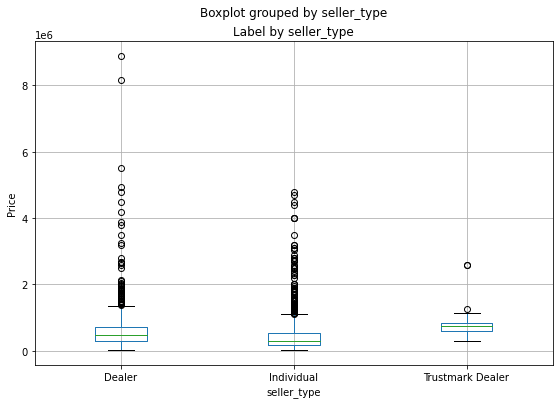

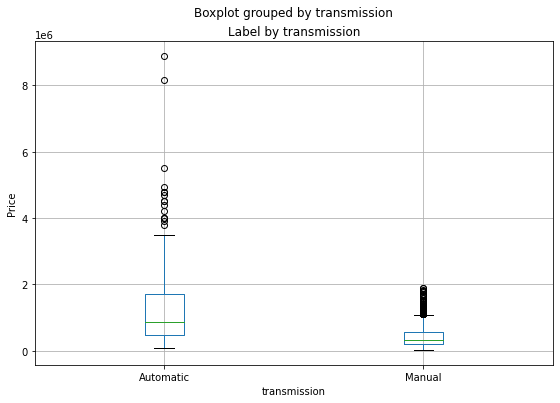

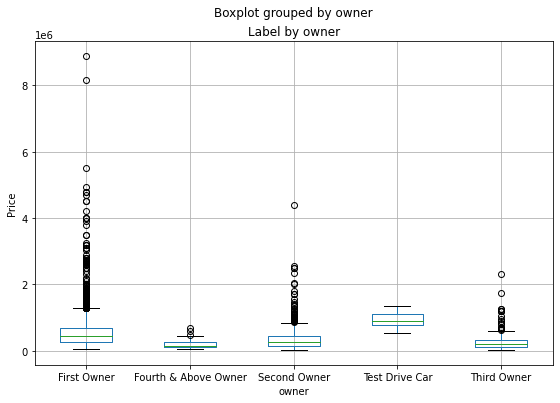

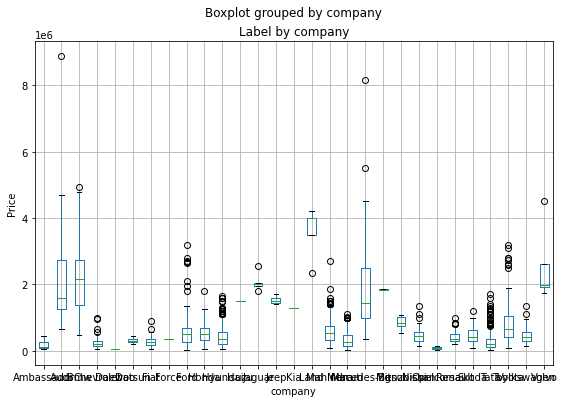

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'selling_price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

<Figure size 1440x432 with 0 Axes>

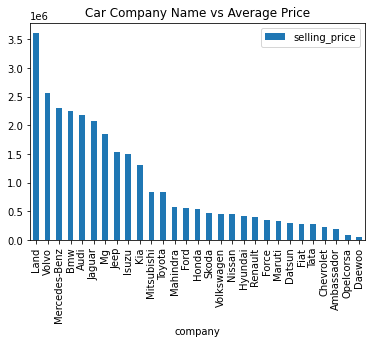

In [ ]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df.groupby(['company'])['selling_price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [ ]:
df_autox.rename(columns={'selling_price':'selling_price_mean'},inplace=True)

In [ ]:
df = df.merge(df_autox,on = 'company',how = 'left')

In [ ]:
x=round(5.041273e+05)
x

504127

In [ ]:
df['company_cat'] = df['selling_price_mean'].apply(lambda x : 0 if round(x) < 500000 else (1 if 500000 <= round(x) < 800000 else 2))

In [ ]:
df["company_cat"].value_counts()

0    2540
1     764
2     273
Name: company_cat, dtype: int64

In [ ]:
df_pr = df.copy()

In [ ]:
df_pr.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company,selling_price_mean,company_cat
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,332031.213619,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,332031.213619,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,413340.612245,0


In [ ]:
### Data encoding
#label encoding
encoders_nums = {"fuel":{"Diesel":0,"Petrol":1,'CNG':2,'LPG':3,'Electric':4},
                 "seller_type":{"Dealer":1,"Individual":0,"Trustmark Dealer":2},
                 "transmission":     {"Manual": 0, "Aitomatic": 1},
                 "owner":  {"First Owner":0, "Second Owner": 1, "Third Owner": 2, "Fourth & Above Owner": 3,
                                  "Test Drive Car": 4}
                 }

df_pr = df_pr.replace(encoders_nums)


In [ ]:
df_pr.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company,selling_price_mean,company_cat
0,Maruti 800 AC,2007,60000,70000,1,0,0,0,Maruti,332031.213619,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0,Maruti,332031.213619,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0,Hyundai,413340.612245,0


In [ ]:

counts = df_pr['name'].value_counts()
counts

Maruti Swift Dzire VDI               54
Maruti Alto 800 LXI                  48
Maruti Alto LXi                      42
Maruti Alto LX                       30
Maruti Swift VDI BSIV                28
                                     ..
Toyota Innova 2.5 E 8 STR             1
Nissan Micra XL CVT                   1
Mahindra Scorpio VLX AT 2WD BSIII     1
Toyota Corolla AE                     1
Hyundai i20 Magna 1.4 CRDi            1
Name: name, Length: 1491, dtype: int64

In [ ]:
pd.get_dummies?

In [ ]:
# One hot encoding
df_pr = pd.get_dummies(df_pr, columns=["fuel", "seller_type","transmission","owner"], prefix=["fuel", "stype","trans","owner"])

In [ ]:
df_pr.head(3)

,name,year,selling_price,km_driven,company,selling_price_mean,company_cat,fuel_0,fuel_1,fuel_2,...,stype_0,stype_1,stype_2,trans_0,trans_Automatic,owner_0,owner_1,owner_2,owner_3,owner_4
0,Maruti 800 AC,2007,60000,70000,Maruti,332031.213619,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Maruti,332031.213619,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Hyundai,413340.612245,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0


In [ ]:
numerical_features

['year', 'km_driven']

In [ ]:
features = numerical_features.copy()
features.extend(['company_cat','fuel_0'	,'fuel_1'	,'fuel_2','fuel_3','fuel_4','stype_0','stype_1','stype_2',
                 'trans_0','trans_Automatic','owner_0','owner_1','owner_2','owner_3','owner_4'])

In [ ]:
features

['year',
 'km_driven',
 'company_cat',
 'fuel_0',
 'fuel_1',
 'fuel_2',
 'fuel_3',
 'fuel_4',
 'stype_0',
 'stype_1',
 'stype_2',
 'trans_0',
 'trans_Automatic',
 'owner_0',
 'owner_1',
 'owner_2',
 'owner_3',
 'owner_4']

In [ ]:
zscore?

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = df_pr[features].apply(zscore)


In [ ]:
y = np.log10(df_pr['selling_price'])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2861, 18)
(716, 18)
(2861,)
(716,)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score?   #Return the coefficient of determination of the prediction.

In [ ]:
reg.score(X_train, y_train)

0.7385241219269849

In [ ]:
reg.coef_

array([ 0.20591886, -0.022793  ,  0.10420275,  0.04450315, -0.04115137,
       -0.00991315, -0.00799162, -0.00383309, -0.0116352 ,  0.00980707,
        0.00846123, -0.03422749,  0.03422749,  0.00711513, -0.00125806,
       -0.00785043, -0.00451518, -0.00154754])

In [ ]:
len(reg.coef_)

18

In [ ]:
reg.intercept_

5.528563634616179

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([5.17357452, 5.42889163, 5.96180948, 5.46295645, 5.71992643,
       5.61474494, 5.43157637, 5.33456923, 5.85344925, 5.02860087,
       5.74058701, 5.5310251 , 5.57209991, 5.56206275, 5.17657856,
       5.62405204, 5.86664306, 5.1000917 , 5.6568897 , 4.89928282,
       5.60832654, 5.24865711, 5.85876727, 5.7295087 , 5.59078928,
       5.41678309, 5.201704  , 5.28368016, 5.68207253, 5.1000917 ,
       5.62264452, 5.27540222, 5.85233091, 6.32207082, 5.58118813,
       5.54565128, 5.97707777, 5.30524026, 5.27878583, 5.50368108,
       5.54235105, 5.71162139, 5.85711008, 5.3914432 , 5.94961282,
       5.51981384, 5.51709783, 5.20596824, 5.12675454, 5.35158519,
       5.89590436, 5.95745578, 6.09803136, 5.91535092, 5.9359523 ,
       5.99081623, 5.3806343 , 5.31721809, 5.19638598, 6.10024196,
       5.69555846, 5.40522514, 5.3928681 , 5.42199411, 5.85626047,
       5.04436372, 5.2117584 , 5.8468397 , 5.19299721, 5.24266819,
       5.12450914, 5.74553827, 5.36437909, 5.37637005, 5.53084

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 58204749195.99127
RMSE : 241256.6044608754


In [ ]:
r2_score?      #math:`R^2` (coefficient of determination) regression score function.

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7159219182103931
Adjusted R2 :  0.7085856119374907


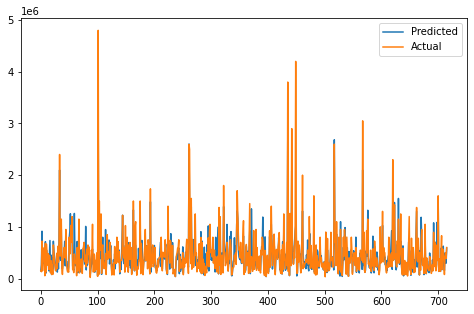

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.7385233293821931

In [ ]:
lasso.coef_

array([ 2.05922248e-01, -2.26693601e-02,  1.04139027e-01,  8.55847647e-02,
       -0.00000000e+00, -1.49561674e-03, -1.47625937e-03, -2.36811283e-03,
       -2.15519655e-02,  0.00000000e+00,  6.02008671e-03, -6.83993189e-02,
        9.75098224e-16,  8.50948202e-03, -0.00000000e+00, -6.99991178e-03,
       -4.02939221e-03, -1.22180237e-03])

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.03372883385002835


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

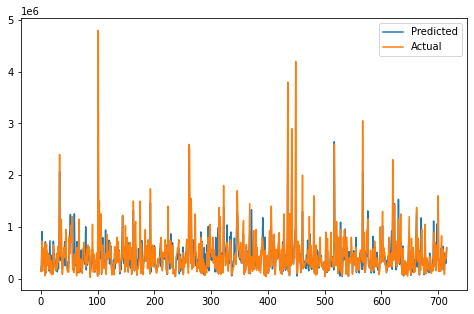

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 58892579698.35747
RMSE : 242677.93409858563
R2 : 0.7125648455933353
Adjusted R2 :  0.705141843040509


In [ ]:
### Cross validation
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import GridSearchCV
# lasso = Lasso()
# parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
# lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
# lasso_regressor.fit(X_train, y_train)
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.03383741425007771


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 58294664244.87859
RMSE : 241442.87988027022
R2 : 0.7154830726700416
Adjusted R2 :  0.7081354332268002


In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)


In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.6641143611880651

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 113717804983.15594
RMSE : 337220.7066346252
R2 : 0.4449810994604463
Adjusted R2 :  0.43064775626143337


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.6}

Using  {'alpha': 0.001, 'l1_ratio': 0.6}  the negative mean squared error is:  -0.03372784518257651


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 58617291601.188416
RMSE : 242110.08157693146
R2 : 0.71390843551793
Adjusted R2 :  0.7065201311267144


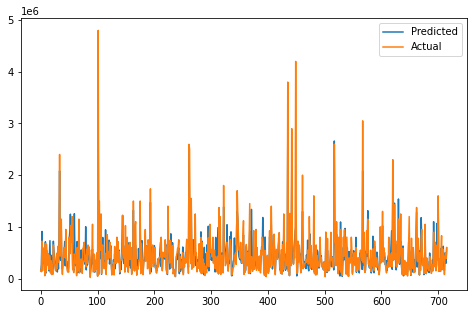

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()